In [4]:

import tkinter as tk
from tkinter import StringVar, filedialog, messagebox, ttk
import cv2
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf

from tensorflow.keras.models import load_model 


model = hub.load('C:\\Users\\Sasindu\\Downloads\\model')


segmentation_model = tf.keras.models.load_model('C:\\Users\\Sasindu\\Downloads\\enchance\\unet_model.keras')




def upload_image():
    global img_cv2, img_tk, modified_img
    file_path = filedialog.askopenfilename()
    if file_path:
        img_cv2 = cv2.imread(file_path)
        img_cv2 = cv2.resize(img_cv2, (400, 300), interpolation=cv2.INTER_LANCZOS4)
        img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk = ImageTk.PhotoImage(img_pil)
        imglabel1.config(image=img_tk)
        imglabel1.image = img_tk
        modified_img = img_cv2  # Set modified_img to the original image initially

def save_modified_image():
    global modified_img
    if modified_img is not None:
        # Ask user for file path to save
        file_path = filedialog.asksaveasfilename(defaultextension=".png",
                                               filetypes=[("PNG files", "*.png"),
                                                          ("JPEG files", "*.jpg"),
                                                          ("All files", "*.*")])
        if file_path:
            cv2.imwrite(file_path, modified_img)
            messagebox.showinfo("Image Saved", f"Image saved as {file_path}")
    else:
        messagebox.showwarning("No Image", "No modified image to save.")

def resize():
    global img_cv2, modified_img
    size_str = size_var.get()
    size = float(size_str)
    if (size > 100 or size < 0):
       messagebox.showwarning("Invalid Input", "Please enter a valid percentage.")
    else:
        
        # Calculate new dimensions
        new_width = int(img_cv2.shape[1] * size/100)
        new_height = int(img_cv2.shape[0] * size/100)

        # Resize the image
        modified_img = cv2.resize(img_cv2, (new_width, new_height), interpolation=cv2.INTER_LANCZOS4)

        # Convert to ImageTk.PhotoImage and update imglabel2
        img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_resized = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_resized)
        imglabel2.image = img_tk_resized

def rotate():
    global img_cv2, modified_img
    angle_str = angle_var.get()
    try:
        angle = float(angle_str)
    except ValueError:
        messagebox.showwarning("Invalid Input", "Please enter a valid numeric angle.")
        return
    
    if angle < 0 or angle > 360:
        messagebox.showwarning("Invalid Input", "Please enter a valid numeric angle between 0 and 360.")
        return

    if img_cv2 is not None:
        # Get image dimensions
        (h, w) = img_cv2.shape[:2]
        center = (w / 2, h / 2)

        # Calculate rotation matrix and rotate the image
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_img = cv2.warpAffine(img_cv2, M, (w, h))

        # Crop the image to remove black borders (Optional)
        # Get the size of the rotated image to determine the bounding box
        cos_angle = np.abs(M[0, 0])
        sin_angle = np.abs(M[0, 1])

        # Compute the new bounding dimensions
        new_w = int((h * sin_angle) + (w * cos_angle))
        new_h = int((h * cos_angle) + (w * sin_angle))

        # Adjust the rotation matrix to account for the change in dimension
        M[0, 2] += (new_w / 2) - center[0]
        M[1, 2] += (new_h / 2) - center[1]

        # Perform the rotation with the adjusted matrix
        rotated_img = cv2.warpAffine(img_cv2, M, (new_w, new_h))

        # Resize the image to original size if needed
        rotated_img = cv2.resize(rotated_img, (w, h))

        # Update modified_img
        modified_img = rotated_img

        # Convert to ImageTk.PhotoImage and update imglabel2
        img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_rotated = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_rotated)
        imglabel2.image = img_tk_rotated
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def invert_colors():
    global img_cv2, modified_img
    if img_cv2 is not None:
        inverted_image = cv2.bitwise_not(img_cv2)
        
        modified_img = inverted_image

        img_rgb = cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_inverted = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_inverted)
        imglabel2.image = img_tk_inverted
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def convert_to_greyscale():
    global img_cv2, modified_img
    if img_cv2 is not None:
        # Convert the image to greyscale
        greyscale_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
        # Convert to 3-channel image for display purposes
        greyscale_img = cv2.cvtColor(greyscale_img, cv2.COLOR_GRAY2RGB)
        
        # Update modified_img
        modified_img = greyscale_img
        
        # Convert to ImageTk.PhotoImage and update imglabel2
        img_pil = Image.fromarray(greyscale_img)
        img_tk_greyscale = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_greyscale)
        imglabel2.image = img_tk_greyscale
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def convert_to_bw():
    global img_cv2, modified_img
    if img_cv2 is not None:
        # Convert the image to greyscale
        greyscale_image = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

        # apply black and white threshold
        _, bw_img = cv2.threshold(greyscale_image, 127, 255, cv2.THRESH_BINARY)
        
        # Update modified_img
        modified_img = bw_img
        
        # Convert to ImageTk.PhotoImage and update imglabel2
        img_pil = Image.fromarray(bw_img)
        img_tk_bw = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_bw)
        imglabel2.image = img_tk_bw
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def convert_to_color():
    global img_cv2, modified_img
    if img_cv2 is not None:
        # Convert the image to RGB
        RGB_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
        
        # Update modified_img
        modified_img = RGB_img
        
        # Convert to ImageTk.PhotoImage and update imglabel2
        img_pil = Image.fromarray(RGB_img)
        img_tk_RGB = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_RGB)
        imglabel2.image = img_tk_RGB
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def watershed_segment():
    global img_cv2, modified_img
    if img_cv2 is not None:
        #convert to grayscale
        gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

        #add binary threshold
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        #remove noise using morphological operations
        kernel = np.ones((3, 3), np.uint8)
        opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

        #determine the sure background area
        sure_bg = cv2.dilate(opening, kernel, iterations=3)

        #Find the sure foreground area
        dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

        #find the unknown region
        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg, sure_fg)

        #labelling markers
        _, markers = cv2.connectedComponents(sure_fg)
        markers = markers + 1
        markers[unknown == 255] = 0
        segmented_img = img_cv2.copy()
        markers = cv2.watershed(segmented_img, markers)
        segmented_img[markers == -1] = [0, 0, 255]

        #update modified image
        modified_img = segmented_img

        # Convert to ImageTk.PhotoImage and update imglabel2
        img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_segmented = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_segmented)
        imglabel2.image = img_tk_segmented
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def color_segment():
    global img_cv2, modified_img
    if img_cv2 is not None:
        # Convert the image from BGR to HSV color space
        hsv_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2HSV)

        # Define lower and upper bounds for the color to segment (e.g., red color)
        lower_bound = np.array([0, 50, 50])  # Lower bound for red color
        upper_bound = np.array([10, 255, 255])  # Upper bound for red color

        # Create a mask using the bounds
        mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

        # Segment the image by combining the mask with the original image
        segmented_img = cv2.bitwise_and(img_cv2, img_cv2, mask=mask)

        # Update the modified image
        modified_img = segmented_img

        # Convert to ImageTk.PhotoImage and update imglabel2
        img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_segmented = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_segmented)
        imglabel2.image = img_tk_segmented
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def apply_filter(filter_type):
    global img_cv2, modified_img
    if img_cv2 is not None:
        if filter_type == 'min':
            filtered_img = cv2.erode(img_cv2, np.ones((3, 3), np.uint8))
        elif filter_type == 'max':
            filtered_img = cv2.dilate(img_cv2, np.ones((3, 3), np.uint8))
        elif filter_type == 'median':
            filtered_img = cv2.medianBlur(img_cv2, 3)
        elif filter_type == 'gaussian':
            filtered_img = cv2.GaussianBlur(img_cv2, (3, 3), 1.0)
        else:
            return
        
        modified_img = filtered_img

        img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_filtered = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_filtered)
        imglabel2.image = img_tk_filtered
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def gamma_correction():
    global img_cv2, modified_img
    if img_cv2 is not None:
        gamma = 1.5  # Example gamma value, can be adjustable
        look_up_table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
        corrected_img = cv2.LUT(img_cv2, look_up_table)

        modified_img = corrected_img

        img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_corrected = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_corrected)
        imglabel2.image = img_tk_corrected
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def histogram_equalization():
    global img_cv2, modified_img
    if img_cv2 is not None:
        img_yuv = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        equalized_img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

        modified_img = equalized_img

        img_rgb = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_equalized = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_equalized)
        imglabel2.image = img_tk_equalized
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def white_balance():
    global img_cv2, modified_img
    if img_cv2 is not None:
        # Convert image to float32 for more precise computation
        img_float = img_cv2.astype(np.float32)

        # Calculate the average color of the image
        avg_color = np.mean(img_float, axis=(0, 1))

        # Scale each channel to make the average color neutral (white)
        white_balance_scale = np.mean(avg_color) / avg_color
        white_balanced_img = img_float * white_balance_scale

        # Clip the values to be in valid range [0, 255] and convert back to uint8
        white_balanced_img = np.clip(white_balanced_img, 0, 255).astype(np.uint8)

        modified_img = white_balanced_img

        img_rgb = cv2.cvtColor(white_balanced_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_white_balanced = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_white_balanced)
        imglabel2.image = img_tk_white_balanced
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def crop():
    global img_cv2, modified_img
    if img_cv2 is not None:
        #get dimensions
        height, width = img_cv2.shape[:2]

        #define crop region
        x_start = int(width * 0.25)
        y_start = int(height * 0.25)
        x_end = int(width * 0.75)
        y_end = int(height * 0.75)

        #crop image
        cropped_img = img_cv2[y_start:y_end, x_start:x_end]

        modified_img = cropped_img

        img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_cropped = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_cropped)
        imglabel2.image = img_tk_cropped
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def adaptive_thresholding():
    global img_cv2, modified_img
    if img_cv2 is not None:
        gray_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
        adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        
        modified_img = adaptive_thresh
        img_pil = Image.fromarray(adaptive_thresh)
        img_tk_adaptive = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_adaptive)
        imglabel2.image = img_tk_adaptive
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

# Otsu’s Thresholding
def otsu_thresholding():
    global img_cv2, modified_img
    if img_cv2 is not None:
        gray_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
        _, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        modified_img = otsu_thresh
        img_pil = Image.fromarray(otsu_thresh)
        img_tk_otsu = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_otsu)
        imglabel2.image = img_tk_otsu
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")
def upload_style_image():
    style_image_path = filedialog.askopenfilename(
        title="Select a Style Image",
        filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp")]
    )
    if style_image_path:
        white_balance_and_stylize(style_image_path)
    else:
        messagebox.showwarning("No Image Selected", "Please select a style image.")

# Function to load and preprocess an image for the model
def load_image(img_cv2):
    img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)  
    img = tf.convert_to_tensor(img_rgb, dtype=tf.float32) / 255.0 
    img = tf.expand_dims(img, 0)  
    return img


def white_balance_and_stylize(style_image_path):
    global img_cv2, modified_img
    if img_cv2 is not None:
      
        img_float = img_cv2.astype(np.float32)
        avg_color = np.mean(img_float, axis=(0, 1))
        white_balance_scale = np.mean(avg_color) / avg_color
        white_balanced_img = img_float * white_balance_scale
        white_balanced_img = np.clip(white_balanced_img, 0, 255).astype(np.uint8)

       
        content_image = load_image(white_balanced_img)
        style_image = load_image(cv2.imread(style_image_path))

        
        
        stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

      
        stylized_image_np = stylized_image.numpy() * 255.0
        stylized_image_np = np.clip(stylized_image_np, 0, 255).astype(np.uint8)
        modified_img = cv2.cvtColor(stylized_image_np[0], cv2.COLOR_RGB2BGR)

        #
        img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk_stylized = ImageTk.PhotoImage(img_pil)
        imglabel2.config(image=img_tk_stylized)
        imglabel2.image = img_tk_stylized
    else:
        messagebox.showwarning("No Image", "Please upload an image first.")

def semantic_segmentation():
    global img_cv2, modified_img
    if img_cv2 is not None:
        # Preprocess the image
        IMG_HEIGHT = 128
        IMG_WIDTH = 128

       
        img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

      
        img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_AREA)
        
      
        img_normalized = img_resized.astype(np.float32) / 255.0

       
        img_input = np.expand_dims(img_normalized, axis=0)  

        
        pred_mask = segmentation_model.predict(img_input)[0]  
        
        
        pred_mask_labels = np.argmax(pred_mask, axis=-1)  

       
        class_colors = {
            0: [0, 0, 0],        
            1: [0, 0, 0],      
            2: [0, 255, 255],      
        }
        color_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
        for class_id, color in class_colors.items():
            color_mask[pred_mask_labels == class_id] = color
        color_mask_resized = cv2.resize(color_mask, (img_cv2.shape[1], img_cv2.shape[0]), interpolation=cv2.INTER_NEAREST)

        alpha = 0.7  
        beta = 0.3   
        gamma = 0    
        segmented_img = cv2.addWeighted(img_cv2, alpha, color_mask_resized, beta, gamma)

        modified_img = segmented_img
        img_display = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)

        img_pil = Image.fromarray(img_display)

        img_tk_segmented = ImageTk.PhotoImage(img_pil)

        imglabel2.config(image=img_tk_segmented)
        imglabel2.image = img_tk_segmented


root = tk.Tk()
root.title("Photo Lab Pro")
root.geometry("1440x900")
root.configure(bg="#1e1e1e")

# Define colors and fonts
primary_color = "#007acc"
secondary_color = "#3a3a3a"
text_color = "#ffffff"
accent_color = "#ff6b6b"
font_large = ("Helvetica", 24, "bold")
font_medium = ("Helvetica", 14)
font_small = ("Helvetica", 12)

# Apply a modern style
style = ttk.Style()
style.theme_use("clam")
style.configure("TButton", font=font_medium, background=primary_color, foreground=text_color)
style.configure("TLabel", font=font_medium, background="#1e1e1e", foreground=text_color)
style.configure("TFrame", background="#1e1e1e")
style.configure("TLabelframe", background="#1e1e1e", foreground=text_color)
style.configure("TLabelframe.Label", font=font_medium, background="#1e1e1e", foreground=text_color)

# Header
header = ttk.Label(root, text="Photo Lab Pro", font=font_large, foreground=primary_color, background="#1e1e1e")
header.pack(pady=20)

# Main content frame
main_frame = ttk.Frame(root)
main_frame.pack(expand=True, fill="both", padx=20, pady=20)

# Left panel
left_panel = ttk.Frame(main_frame, width=250)
left_panel.pack(side="left", fill="y", padx=(0, 10))

# Center panel
center_panel = ttk.Frame(main_frame)
center_panel.pack(side="left", expand=True, fill="both", padx=10)

# Right panel
right_panel = ttk.Frame(main_frame, width=250)
right_panel.pack(side="right", fill="y", padx=(10, 0))

# Image display areas
image_frame1 = ttk.LabelFrame(center_panel, text="Original Image")
image_frame1.pack(side="left", expand=True, fill="both", padx=(0, 5))

image_frame2 = ttk.LabelFrame(center_panel, text="Modified Image")
image_frame2.pack(side="right", expand=True, fill="both", padx=(5, 0))

imglabel1 = ttk.Label(image_frame1)
imglabel1.pack(expand=True)

imglabel2 = ttk.Label(image_frame2)
imglabel2.pack(expand=True)

# Left panel sections
upload_save_frame = ttk.LabelFrame(left_panel, text="Upload & Save")
upload_save_frame.pack(fill="x", pady=(0, 10))

ttk.Button(upload_save_frame, text="Upload Image", command=upload_image).pack(fill="x", pady=5)
ttk.Button(upload_save_frame, text="Save Image", command=save_modified_image).pack(fill="x", pady=5)

basic_ops_frame = ttk.LabelFrame(left_panel, text="Basic Operations")
basic_ops_frame.pack(fill="x", pady=10)

ttk.Button(basic_ops_frame, text="Resize Image", command=resize).pack(fill="x", pady=5)
ttk.Button(basic_ops_frame, text="Rotate Image", command=rotate).pack(fill="x", pady=5)
ttk.Button(basic_ops_frame, text="Crop Image", command=crop).pack(fill="x", pady=5)

deep_ops_frame = ttk.LabelFrame(left_panel, text="Deep Learning")
deep_ops_frame.pack(fill="x", pady=10)

ttk.Button(deep_ops_frame, text="Add Style Image", command=upload_style_image).pack(fill="x", pady=5)
ttk.Button(deep_ops_frame, text="image segmentation", command=semantic_segmentation).pack(fill="x", pady=5)


# Right panel sections
segmentation_frame = ttk.LabelFrame(right_panel, text="Image Segmentation")
segmentation_frame.pack(fill="x", pady=(0, 10))

ttk.Button(segmentation_frame, text="Watershed Segmentation", command=watershed_segment).pack(fill="x", pady=5)
ttk.Button(segmentation_frame, text="Color Based Segmentation", command=color_segment).pack(fill="x", pady=5)
ttk.Button(segmentation_frame, text="Adaptive Thresholding", command=adaptive_thresholding).pack(fill="x", pady=5)
ttk.Button(segmentation_frame, text="Otsu's Thresholding", command=otsu_thresholding).pack(fill="x", pady=5)

filtering_frame = ttk.LabelFrame(right_panel, text="Filtering")
filtering_frame.pack(fill="x", pady=10)

ttk.Button(filtering_frame, text="Minimum Filter", command=lambda: apply_filter('min')).pack(fill="x", pady=5)
ttk.Button(filtering_frame, text="Maximum Filter", command=lambda: apply_filter('max')).pack(fill="x", pady=5)
ttk.Button(filtering_frame, text="Median Filter", command=lambda: apply_filter('median')).pack(fill="x", pady=5)
ttk.Button(filtering_frame, text="Gaussian Blur Filter", command=lambda: apply_filter('gaussian')).pack(fill="x", pady=5)

# Footer frame for color conversion and transformation
footer_frame = ttk.Frame(root)
footer_frame.pack(side="bottom", fill="x", padx=20, pady=20)

# Color Conversion section in footer
color_conv_frame = ttk.LabelFrame(footer_frame, text="Color Conversion")
color_conv_frame.pack(side="left", fill="x", expand=True, padx=(0, 10))

ttk.Button(color_conv_frame, text="Convert to Binary", command=convert_to_bw).pack(side="left", padx=5, pady=5)
ttk.Button(color_conv_frame, text="Convert to Color", command=convert_to_color).pack(side="left", padx=5, pady=5)
ttk.Button(color_conv_frame, text="Convert to Greyscale", command=convert_to_greyscale).pack(side="left", padx=5, pady=5)
ttk.Button(color_conv_frame, text="Invert Colors", command=invert_colors).pack(side="left", padx=5, pady=5)

# Color Transformation section in footer
color_transform_frame = ttk.LabelFrame(footer_frame, text="Color Transformation")
color_transform_frame.pack(side="right", fill="x", expand=True, padx=(10, 0))

ttk.Button(color_transform_frame, text="Gamma Correction", command=gamma_correction).pack(side="left", padx=5, pady=5)
ttk.Button(color_transform_frame, text="Histogram Equalization", command=histogram_equalization).pack(side="left", padx=5, pady=5)
ttk.Button(color_transform_frame, text="White Balance", command=white_balance).pack(side="left", padx=5, pady=5)

root.mainloop()

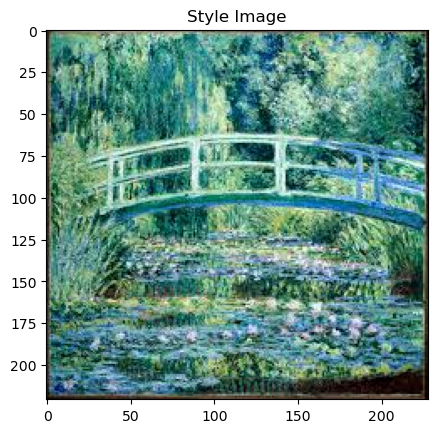

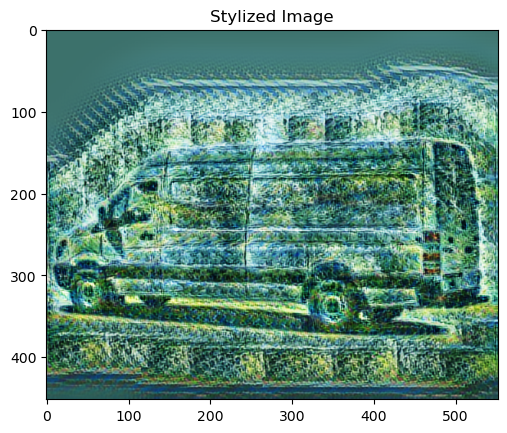